In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# After importing the required packages,lets load the dataset from flat file...

In [8]:
mydata=pd.read_csv("diabetes.csv")

In [9]:
mydata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# we can see there are 768 rows and 9 columns in the dataset...out of which 7 cols are integers and 2 columns are float..

In [12]:
# Let us check whether dataset has any other non-numeric value in rows or columns...

In [13]:
mydata[~mydata.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [14]:
# since there is no output, we can conclude that there is no non-numeric values or junk characters in the dataset...

In [15]:
# After Analysing the dataset, we can see '0' values for the columns 'Glucose','BloodPressure','SkinThickness','Insulin','BMI'
# which is practically not possible for any human beings. So there is definitely missing values for these columns..
# Lets see the count of missing values for these columns..

In [16]:
print((mydata[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [17]:
# Deleting the missing values may reduce the dataset count aggressively from 768 to 392...
# So, lets first update those '0' values to NaN values..


In [18]:
mydata[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =mydata[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [19]:
mydata.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
mydata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [21]:
# Then lets replace the missing values(NaN) of each columns by its mean value...

In [22]:
mydata.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [23]:
mydata.fillna(mydata.mean(), inplace = True)

In [24]:
mydata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
# now we can see there is no missing values in the dataset...

In [26]:
mydata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [27]:
# From the dataset, we can identify that out of the 768 womens, 500 are labeled as 0 (non-diabetic) and 268 as 1 (diabetic)..
# So from the dataset given we can find that majority of the women are non diabetic...

In [28]:
mydata.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [29]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [30]:
# After studying the mean, median & std for all the attributes..
# we can see for Glucose, BloodPressure & BMI the mean & median are very close and for BloodPressure it is almost equal...

In [31]:
# Lets find the correlation between the attributes in the dataset...

In [32]:
mydata.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [33]:
# We can able to see good correlation between Age vs Pregnancies, Glucose vs Outcome, BMI vs SkinThickness & Glucose vs Insulin

In [34]:
# Lets plot the histogram for all the attributes...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B705978>,
      dtype=object)

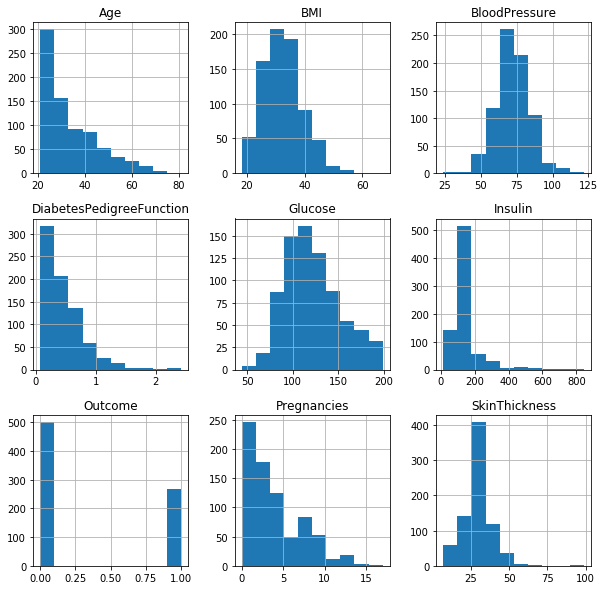

In [35]:
mydata.hist(figsize=(10,10))

In [36]:
# From the Histogram chart, only Bloodpressure, BMI and Glucose shows more or less the normal distribution...
# Rest of the attributes are mostly right skewed ones...

In [37]:
# Lets plot the boxplot to visualize quartile range and the outliers..

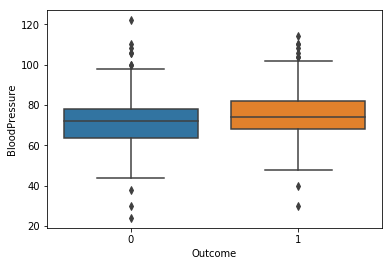

In [38]:
sns.boxplot(y="BloodPressure",x="Outcome",data=mydata)

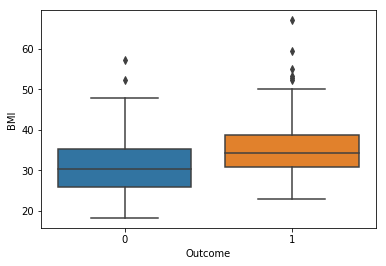

In [39]:
sns.boxplot(y="BMI",x="Outcome",data=mydata)

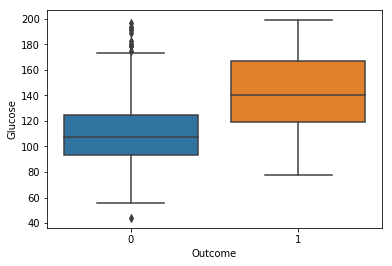

In [40]:
sns.boxplot(y="Glucose",x="Outcome",data=mydata)

In [41]:
# Lets plot the pairplot for all the attributes by giving hue as 'Outcome'...

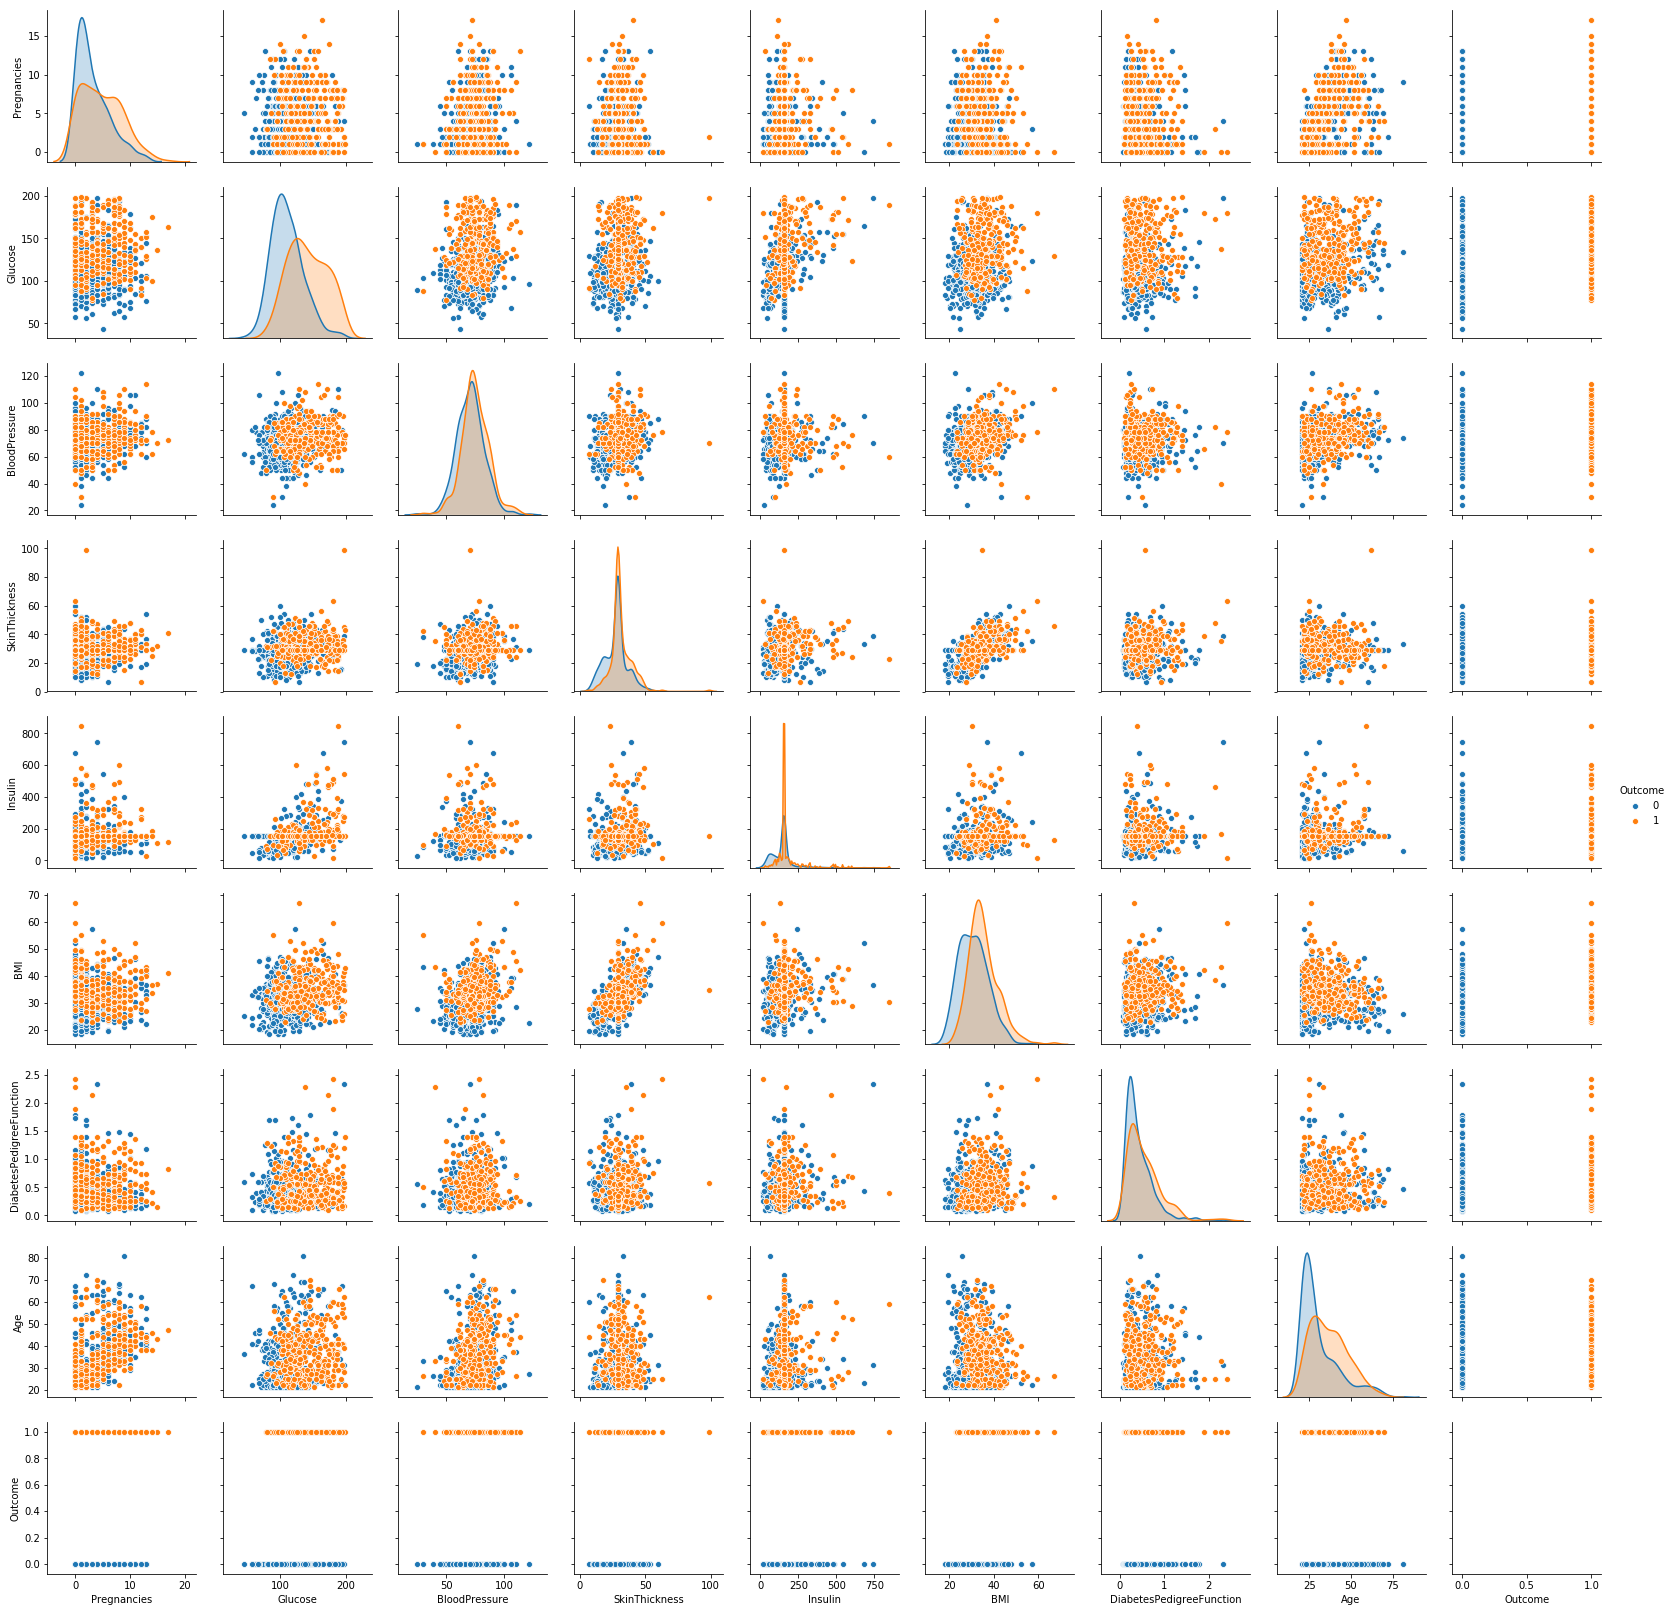

In [36]:
sns.pairplot(data=mydata, hue="Outcome")

In [42]:
# Here also you can find only BMI, Bloodpressure and Glucose has normal distribution curves..
# And rest of the attributes are right skewed ones or asymmetrical...

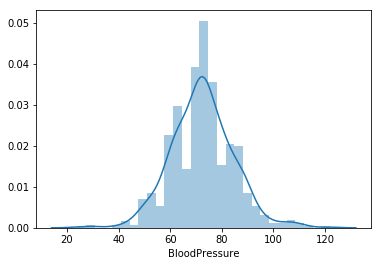

In [44]:
sns.distplot(mydata['BloodPressure'])
#sns.distplot(mydata["Glucose"])
#sns.distplot(mydata["BMI"])

In [48]:
# Let us plot Histogram for BMI, Bloodpressure vs Outcome...

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D31E8D0>,
      dtype=object)

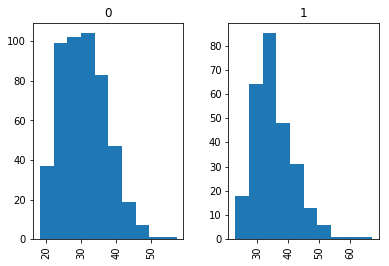

In [47]:
mydata.hist(by="Outcome", column="BMI")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000034219A20>,
      dtype=object)

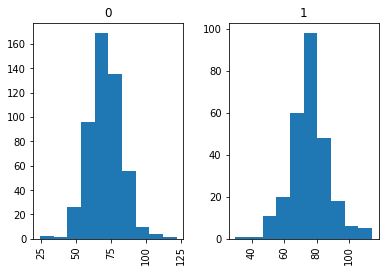

In [74]:
mydata.hist(by="Outcome", column='BloodPressure')

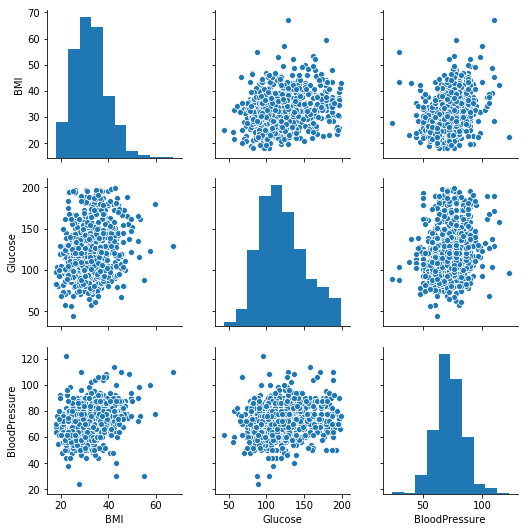

In [44]:
sns.pairplot(mydata[['BMI','Glucose','BloodPressure']])

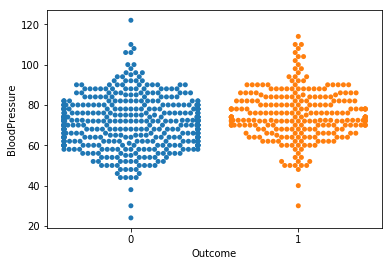

In [45]:
sns.swarmplot(mydata['Outcome'], mydata['BloodPressure'])

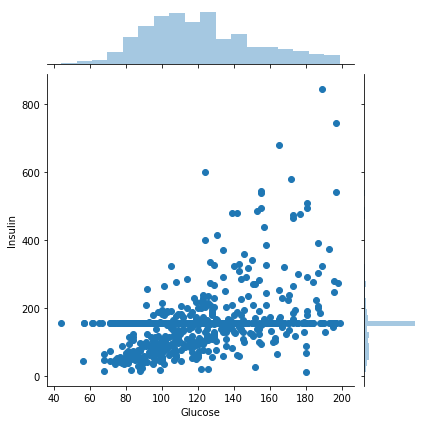

In [39]:
sns.jointplot(mydata['Glucose'], mydata['Insulin'])

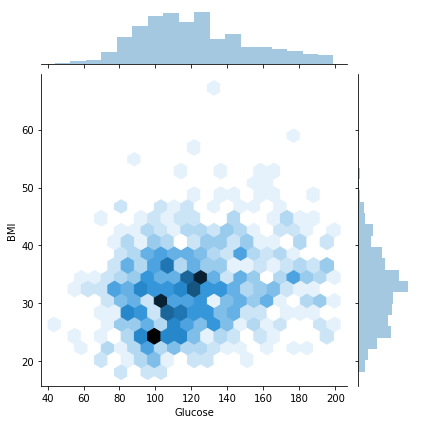

In [46]:
sns.jointplot(mydata['Glucose'], mydata['BMI'], kind='hex')

In [49]:
# Lets study the Linear relationship between the attributes BloodPressure, BMI and Glucose..

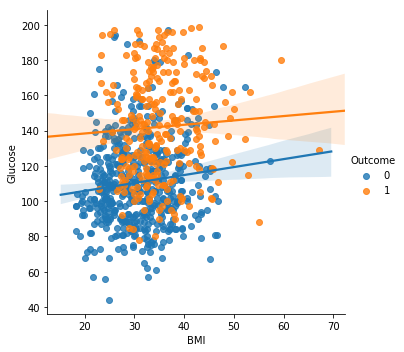

In [74]:
sns.lmplot(x="BMI", y="Glucose", hue="Outcome", data=mydata)

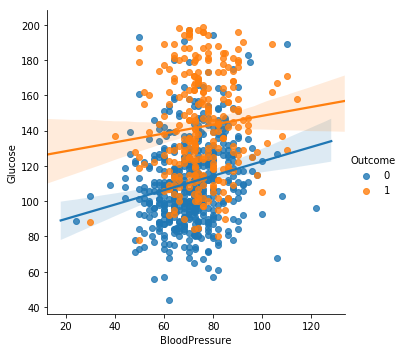

In [55]:
sns.lmplot(x="BloodPressure", y="Glucose", hue="Outcome", data=mydata)

In [45]:
# Pima Diabetes Project - Insight Summary:

# After performing the exploratory data analysis, we can able to find BloodPressure, BMI and Glucose were the attributes which
# controls the Outcome considerably whether the women is going to be diabetic or non diabetic..
# There were missing values in the dataset which was identified and updated by its attribute's mean value.
# There are many outliers in the dataset which are shown using Box plot graph..
# Mean & Median for BloodPressure, BMI & Glucose are so close..hence it shows the normal distribution...
# From Histogram and Pairplot, it is visible that BloodPressure shows very good normal distribution graph...
# Apart from BloodPressure, BMI & Glucose rest of the attributes are mostly right skewed or asymmetrical..
# Good correlation exists between Age vs Pregnancies, Glucose vs Outcome, BMI vs SkinThickness & Glucose vs Insulin..
# We can see considerable good Linear relationship between attributes Bloodpressure vs Glucose..